<a href="https://www.kaggle.com/code/atharvsabde/heart-failure-eda-prediction-7-models-ann?scriptVersionId=158792000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:red;
              text-align:center;'>
        Heart Failure Prediction Using Machine learning
    </h2>
    </div>

![heart](https://www.narayanahealth.org/sites/default/files/pillar-page/heart-failure-banner-bg.jpg)

Heart failure occurs when the heart's ability to pump blood diminishes, leading to inadequate circulation. Common causes include coronary artery disease, hypertension, and previous heart attacks. Globally, heart failure affects millions, with an estimated 26 million people diagnosed. Its prevalence is rising due to aging populations and lifestyle factors. Timely intervention, lifestyle changes, and medical management are crucial for mitigating its impact.

# **<span style="color:#3B7CE7">Domain Knowledge</span>**

`Anaemia` : Indicates decrease of red blood cells or hemoglobin.

`Creatinine Phosphokinase` : It is an enzyme present in the heart, whose elevated levels in the bloodstream indicate muscle or cardiac damage.

`Diabetes` : It is a chronic medical condition characterized by elevated blood sugar levels resulting from insufficient insulin production or the body's inability to effectively use insulin.

`Ejection Fraction` : It is a measure of the percentage of blood that the heart's left ventricle pumps out with each contraction, providing an assessment of the heart's pumping efficiency; a lower EF may indicate heart dysfunction or failure.

`Blood Pressure` : Blood pressure is the force exerted by circulating blood against the walls of arteries.

`Platelets` : platelets help prevent excessive bleeding by forming blood clots at the site of vascular injury.

`Serum Creatinine` : Serum creatinine is a waste product generated by muscle metabolism that is filtered out of the blood by the kidneys.

`Serum Sodium` : Serum sodium refers to the concentration of sodium ions in the liquid component of blood.

`sex` : The sex of the patient.

`Smoking` : If the patient smokes actively or ever did in past.

`Time` : It is the time of the patient's follow-up visit for the disease in months.

`Death Event` : If the patient deceased during the follow-up period.

# **<span style="color:#3B7CE7">Importing Libraries</span>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from colorama import Fore, Back, Style 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# **<span style="color:#3B7CE7"> Exploring Data </span>**

In [2]:
#importing data

df= pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **<span style="color:#3B7CE7"> Data Analysis </span>**

# Is there any relation between age and death event?

In [5]:
fig = px.box(df, x='DEATH_EVENT', y='age', points="all")
fig.update_layout(
    title_text=" Age and Death event relation : death = 1 survive =0")
fig.show()

* survived people age spread is high between 50 - 65
* dead people age spread is high between 55 - 75
* There is not much difference thus we can say age is not the only factor for heart failure

# Is there any relation between gender and death event?

In [6]:
fig = px.violin(df, y="age", x="sex", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

* The Survival is high for both male between 50 to 70 and female's age between 50 to 65 respectively

* We can conclude that gender does not have much effect on heart failure

# Diabetes and Survival 

In [7]:
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]

diabetes_yes_survive = diabetes_yes[df["DEATH_EVENT"]==0]
diabetes_yes_not_survive = diabetes_yes[df["DEATH_EVENT"]==1]
diabetes_no_survive = diabetes_no[df["DEATH_EVENT"]==0]
diabetes__no_not_survive = diabetes_no[df["DEATH_EVENT"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[df["DEATH_EVENT"]==0]),len(df[df["DEATH_EVENT"]==1]),
         len(diabetes_no[df["DEATH_EVENT"]==0]),len(diabetes_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes")
fig.show()

* non diabetes patient has most chances of survival
* diabetes patient are more prone to death (27%)

# Anaemia and Survival

In [8]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

anaemia_yes_survival = anaemia_yes[df["DEATH_EVENT"]==0]
anaemia_yes_not_survival = anaemia_yes[df["DEATH_EVENT"]==1]
anaemia_no_survival = anaemia_no[df["DEATH_EVENT"]==0]
anaemia_no_not_survival = anaemia_no[df["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[df["DEATH_EVENT"]==0]),len(anaemia_yes[df["DEATH_EVENT"]==1]),
         len(anaemia_no[df["DEATH_EVENT"]==0]),len(anaemia_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show()

* Person not suffering from anaemia has more chances of survival
* person suffering from anaemia and still survived are 27.8%
* thus we can say anaemia does not play major role in heart failure

# High blood pressure and survival

In [9]:
hbp_yes = df[df['high_blood_pressure']==1]
hbp_no = df[df['high_blood_pressure']==0]

bp_yes_survive = hbp_yes[df["DEATH_EVENT"]==0]
hbp_yes_not_survive = hbp_yes[df["DEATH_EVENT"]==1]
hbp_no_survive = hbp_no[df["DEATH_EVENT"]==0]
hbp_no_not_survive = hbp_no[df["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[df["DEATH_EVENT"]==0]),len(hbp_yes[df["DEATH_EVENT"]==1]),
         len(hbp_no[df["DEATH_EVENT"]==0]),len(hbp_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()



* High BP patients those not survived accounts only 13%

# Smoking and Survival

In [10]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

smoking_yes_survival = smoking_yes[df["DEATH_EVENT"]==0]
smoking_yes_not_survival = smoking_yes[df["DEATH_EVENT"]==1]
smoking_no_survival = smoking_no[df["DEATH_EVENT"]==0]
smoking_no_not_survival = smoking_no[df["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[df["DEATH_EVENT"]==0]),len(smoking_yes[df["DEATH_EVENT"]==1]),
         len(smoking_no[df["DEATH_EVENT"]==0]),len(smoking_no[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking")
fig.show()

# Checking relation between other non-binary features and death event

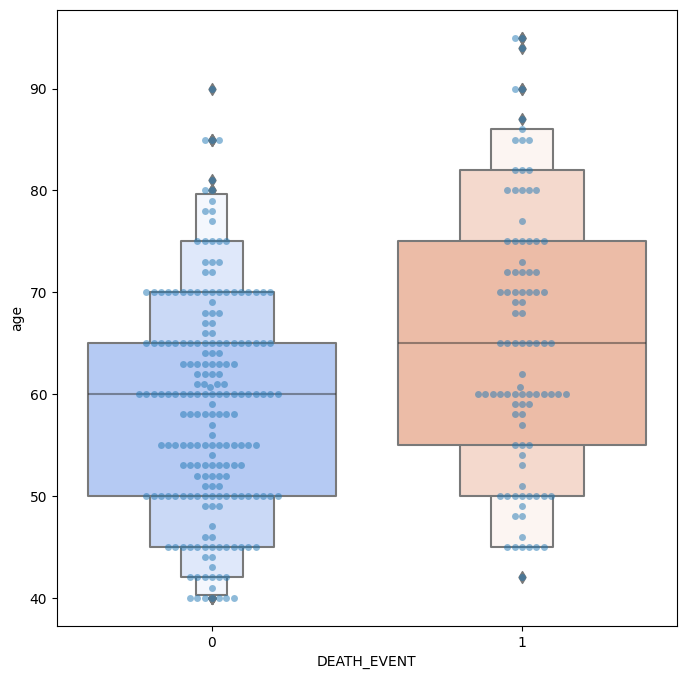

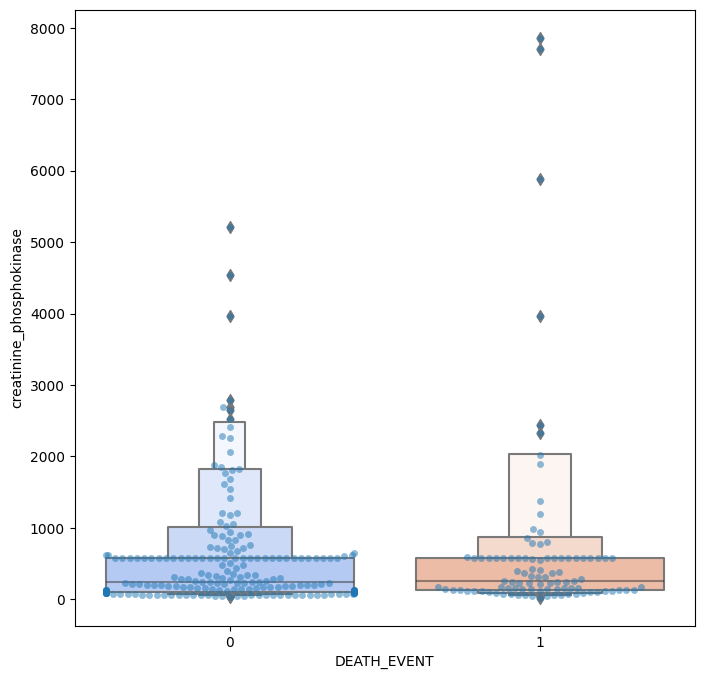

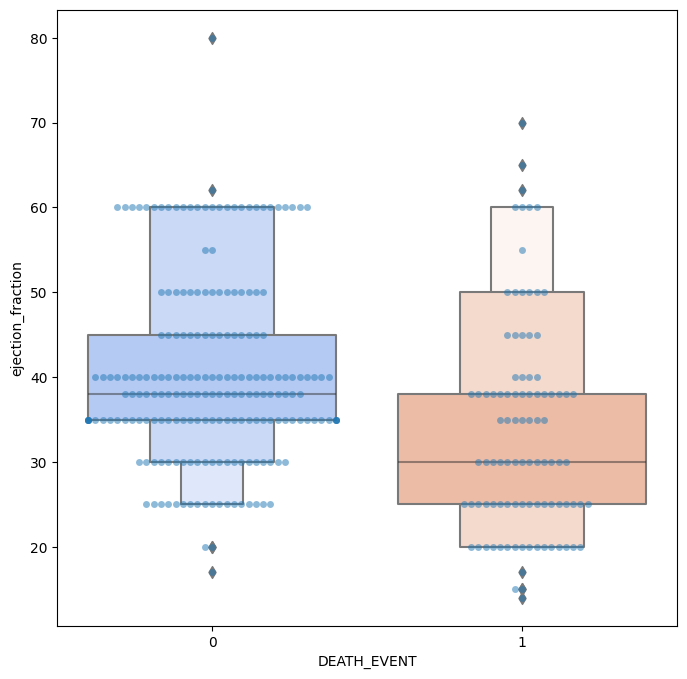

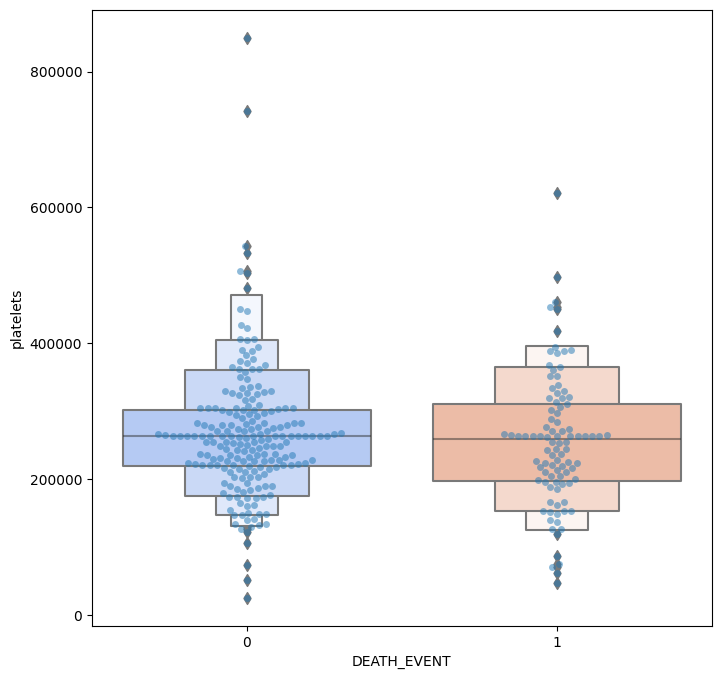

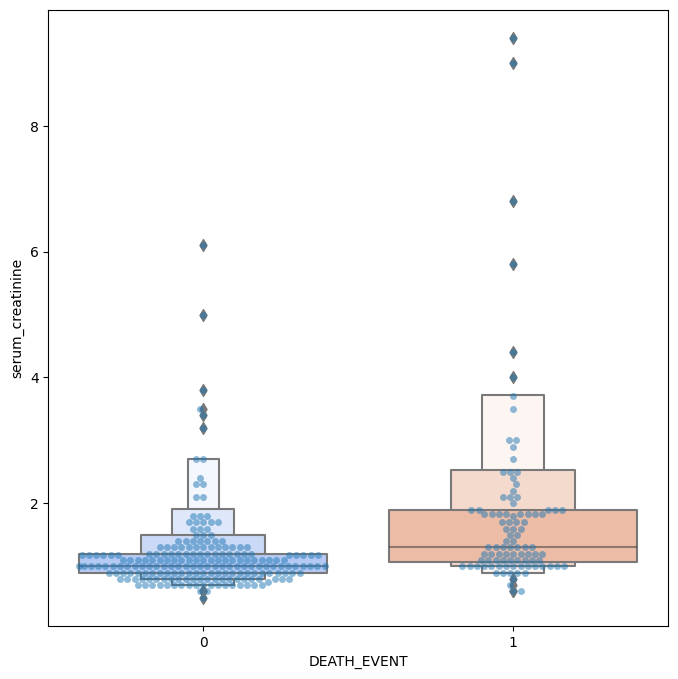

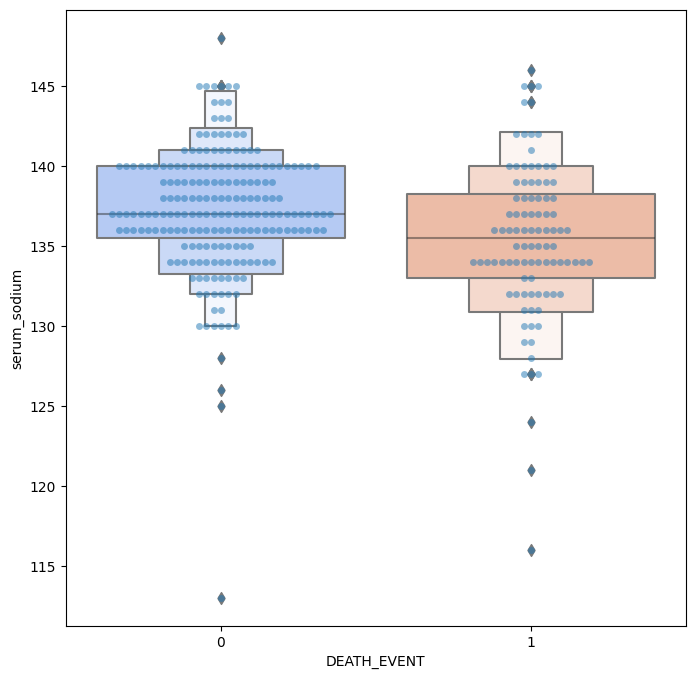

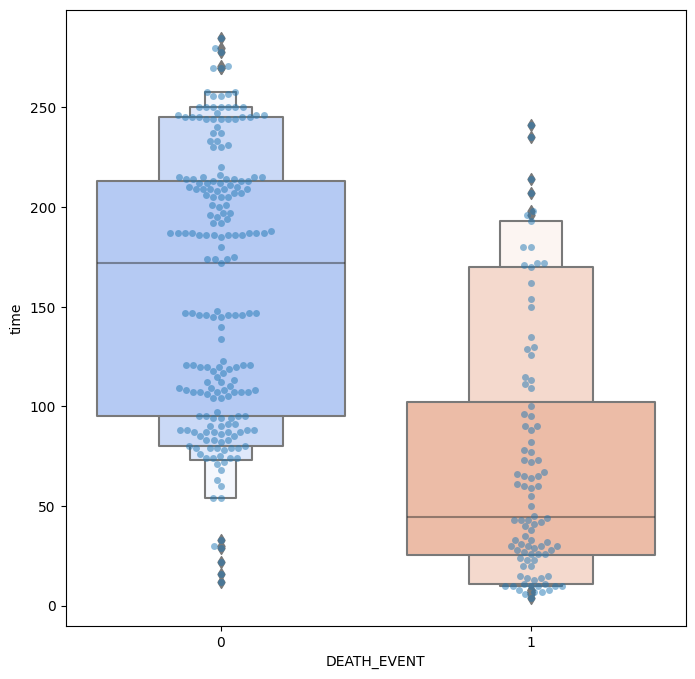

In [11]:
## Boxen and swarm plot of some non binary features.

feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=df["DEATH_EVENT"], y=df[i], alpha=0.5)
    sns.boxenplot(x=df["DEATH_EVENT"], y=df[i], palette="coolwarm")
    plt.show()

* By looking at these graphs we can see major differences on factors like time, ejection fraction and serum creatinine. so we can use these features in our model building process

# **<span style="color:#3B7CE7"> Building Models </span>**

In [12]:
#preprocessing and spliting data

Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

accuracy_list = []

# logistic regression

In [13]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [14]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


# Support Vector Classifier

In [15]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [16]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


# K Neighbors Classifier

In [17]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [18]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  91.67%


# Decision Tree Classifier

In [19]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [20]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  90.00%


# Random Forest Classifier

In [21]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [22]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


# Gradient Boosting Classifier

In [23]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [24]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


# xgbrf classifier

In [25]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [26]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  91.67%


# Artificial Neural Network

In [27]:
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [28]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [29]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [30]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 2s 59ms/step - loss: 0.6929 - accuracy: 0.6257 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.6480 - val_loss: 0.6903 - val_accuracy: 0.6667
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.6480 - val_loss: 0.6894 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.6480 - val_loss: 0.6885 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6887 - accuracy: 0.6480 - val_loss: 0.6875 - val_accuracy: 0.6667
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.6877 - accuracy: 0.6480 - val_loss: 0.6865 - val_accuracy: 0.6667
Epoch 8/50
6/6 [=================

In [31]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 71.64%


<BR>
    
    
<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
      If you liked this Notebook, please do upvote.

If you have any suggestions or questions, feel free to comment!

       Best Wishes!
   </span>
</div>

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.2em; font-weight: bold;font-family: Arial;">@atharvsabde</span>
</div>